## Working with DGGAL in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/08_dggal.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/08_dggal.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/08_dggal.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/08_dggal.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2dggal

In [2]:
from vgrid.conversion.latlon2dggs import latlon2dggal

dggs_type = "healpix"  # choose one from ['gnosis','isea4r','isea9r','isea3h','isea7h','isea7h_z7',
# 'ivea4r','ivea9r','ivea3h','ivea7h','ivea7h_z7','rtea4r','rtea9r','rtea3h','rtea7h','rtea7h_z7','healpix','rhealpix']
resolution = 10
dggal_id = latlon2dggal(dggs_type, 10.775276, 106.706797, resolution)
dggal_id

'K7-8BF4D'

### DGGAL to Polygon

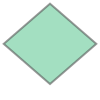

In [3]:
from vgrid.conversion.dggs2geo.dggal2geo import dggal2geo

dggal_geo = dggal2geo(dggs_type, dggal_id)
dggal_geo

### DGGAL to GeoJSON

In [4]:
from vgrid.conversion.dggs2geo.dggal2geo import dggal2geojson
import json

dggal_geojson = dggal2geojson("isea3h", "H0-3717A4-C")
# dggal_geojson

### DGGS-JSON to GeoJSON

In [5]:
from vgrid.utils.geometry import dggal_dggsjsonfile2geojson

# dggs_json_file= "https://raw.githubusercontent.com/opengeoshub/vopendata/main/dggs/dggsjson.json"
dggs_json_file = "https://maps.gnosis.earth/ogcapi/collections/sentinel2-l2a/dggs/ISEA3H/zones/G7-67252-B/data.json?zone-depth=8&datetime=2022-10-28&properties=B08"
dggal_dggsjsonfile2geojson(dggs_json_file)

0

### Vector to DGGAL

Processing features: 100%|██████████| 1/1 [00:05<00:00,  5.18s/it]


<Axes: >

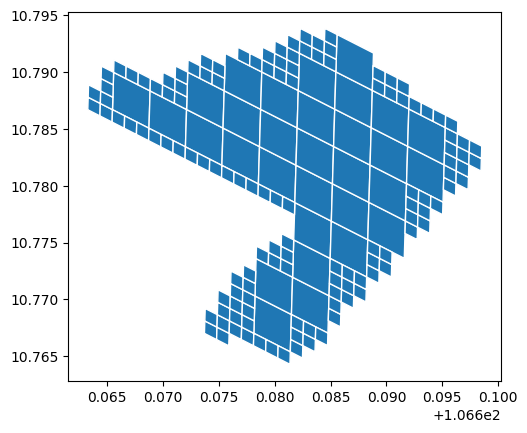

In [6]:
from vgrid.conversion.vector2dggs.vector2dggal import vector2dggal

file_path = "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon2.geojson"
dggs_type = "isea9r"  # choose one from ['gnosis','isea4r','isea9r','isea3h','isea7h','isea7h_z7',
# 'ivea4r','ivea9r','ivea3h','ivea7h','ivea7h_z7','rtea4r','rtea9r','rtea3h','rtea7h','rtea7h_z7','healpix','rhealpix']
resolution = 10
vector_to_dggal = vector2dggal(
    dggs_type=dggs_type,
    vector_data=file_path,
    resolution=resolution,
    compact=True,
    predicate="intersects",
    output_format="gpd",
)
# Visualize the output
vector_to_dggal.plot(edgecolor="white")

### DGGAL Compact

<Axes: >

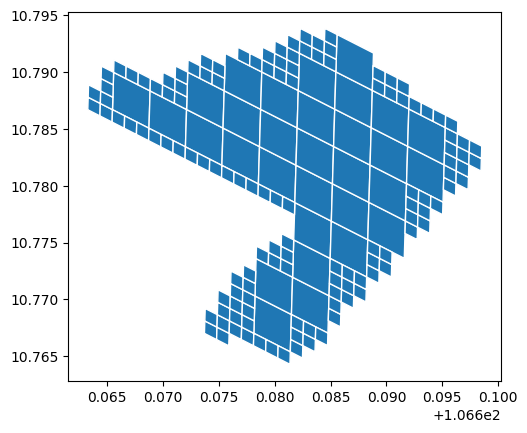

In [7]:
from vgrid.conversion.dggscompact.dggalcompact import dggalcompact

dggal_compacted = dggalcompact(dggs_type, vector_to_dggal, output_format="gpd")
dggal_compacted.plot(edgecolor="white")

### DGGAL Expand

<Axes: >

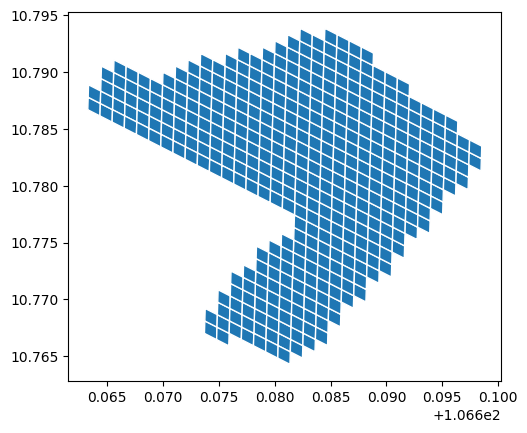

In [8]:
from vgrid.conversion.dggscompact.dggalcompact import dggalexpand

dggal_expanded = dggalexpand(
    dggs_type, vector_to_dggal, resolution=10, output_format="gpd"
)
# dggal_expanded
dggal_expanded.plot(edgecolor="white")

### DGGAL Binning

Generating ISEA9R DGGS: 100%|██████████| 9949/9949 [00:50<00:00, 195.15it/s]


<Axes: >

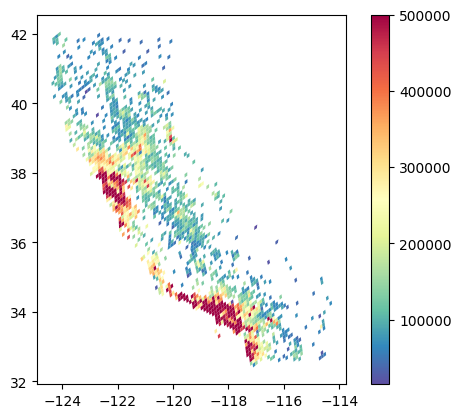

In [9]:
from vgrid.binning.dggalbin import dggalbin

dggs_type = "isea9r"  # choose one from ['gnosis','isea4r','isea9r','isea3h','isea7h','isea7h_z7',
# 'ivea4r','ivea9r','ivea3h','ivea7h','ivea7h_z7','rtea4r','rtea9r','rtea3h','rtea7h','rtea7h_z7','healpix','rhealpix']
file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/housing.csv"
)
stats = "max"
dggal_bin = dggalbin(
    dggs_type,
    file_path,
    resolution=6,
    stats=stats,
    numeric_field="median_house_value",
    # category="category",
    output_format="gpd",
)
# dggal_bin.head()
dggal_bin.plot(
    column=stats,  # numeric column to base the colors on
    cmap="Spectral_r",  # color scheme (matplotlib colormap)
    legend=True,
    linewidth=0.2,  # boundary width (optional)
)

### Raster to DGGAL

#### Download and open raster

In [ ]:
from vgrid.utils.io import download_file
import rasterio
from rasterio.plot import show

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)
src = rasterio.open(raster_file, "r")
print(src.meta)
show(src)

#### Convert raster to DGGAL

In [11]:
# %pip install folium

In [ ]:
from vgrid.conversion.raster2dggs.raster2dggal import raster2dggal

dggs_type = "isea3h"  # choose one from ['gnosis','isea4r','isea9r','isea3h','isea7h','isea7h_z7',
# 'ivea4r','ivea9r','ivea3h','ivea7h','ivea7h_z7','rtea4r','rtea9r','rtea3h','rtea7h','rtea7h_z7','healpix','rhealpix']
raster_to_dggal = raster2dggal(dggs_type, raster_file, output_format="gpd")

# Visualize the output
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=28)

dggal_layer = folium.GeoJson(
    raster_to_dggal,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 0.8,
    },
    popup=folium.GeoJsonPopup(
        fields=[f"dggal_{dggs_type}", "band_1", "band_2", "band_3"],
        aliases=["Zone ID", "Band 1", "Band 2", "Band 3"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(dggal_layer.get_bounds())

# Display the map
m

### DGGAL Generator

Generating ISEA7H DGGS:   0%|          | 0/72 [00:00<?, ?it/s]

Generating ISEA7H DGGS: 100%|██████████| 72/72 [00:00<00:00, 203.35it/s]


<Axes: >

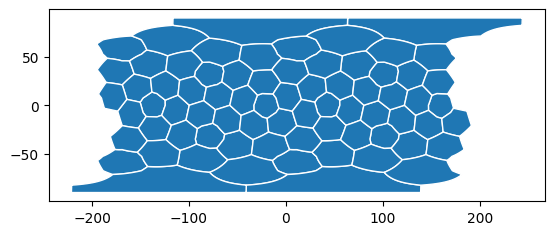

In [22]:
from vgrid.generator.dggalgen import dggalgen

dggs_type = "isea7h"  # choose one from ['gnosis','isea4r','isea9r','isea3h','isea7h','isea7h_z7',
# 'ivea4r','ivea9r','ivea3h','ivea7h','ivea7h_z7','rtea4r','rtea9r','rtea3h','rtea7h','rtea7h_z7','healpix','rhealpix']
resolution = 1
bbox = (
    106.699007,
    10.762811,
    106.717674,
    10.778649,
)  # (min_lon, min_lat, max_lon, max_lat)
dggal_grid = dggalgen(
    dggs_type=dggs_type,
    resolution=resolution,
    # bbox=bbox,
    # compact=True,
    output_format="gpd",
)
# dggal_grid
dggal_grid.plot(edgecolor="white")

### DGGAL Inspect

In [24]:
from vgrid.stats.dggalstats import dggalinspect

dggs_type = "ivea3h"  # choose one from ['gnosis','isea4r','isea9r','isea3h','isea7h','isea7h_z7',
# 'ivea4r','ivea9r','ivea3h','ivea7h','ivea7h_z7','rtea4r','rtea9r','rtea3h','rtea7h','rtea7h_z7','healpix','rhealpix']
resolution = 5
dggal_inspect = dggalinspect(dggs_type, resolution)
dggal_inspect = dggal_inspect[dggal_inspect["crossed"] == False]
dggal_inspect.head()

Generating IVEA3H DGGS:   1%|▏         | 31/2432 [00:00<00:07, 301.40it/s]

Generating IVEA3H DGGS: 100%|██████████| 2432/2432 [00:03<00:00, 692.05it/s]


dggal_ivea3h  resolution  center_lat  center_lon   avg_edge_len  \
0       C0-0-B           5   58.412658 -168.800000  305620.387848   
1       C0-0-C           5   61.551380 -163.920207  286206.196418   
2       C0-0-D           5   56.995294 -161.834929  286199.631781   
3       C0-1-B           5   65.330215 -168.800000  286111.594976   
4       C0-1-C           5   68.638747 -162.198692  285940.493160   

      cell_area  cell_perimeter  \
0  1.747977e+11    1.528102e+06   
1  2.099084e+11    1.717237e+06   
2  2.099084e+11    1.717198e+06   
3  2.099036e+11    1.716670e+06   
4  2.099040e+11    1.715643e+06   

                                            geometry  crossed  norm_area  \
0  POLYGON ((-168.8 60.71183, -169.29486 60.59233...    False   0.833438   
1  POLYGON ((-164.52246 59.0424, -164.08622 59.09...    False   1.000846   
2  POLYGON ((-164.1104 54.55599, -163.6502 54.587...    False   1.000846   
3  POLYGON ((-174.82544 66.31288, -174.76975 66.0...    False   1.000823   
4  POLYGON ((-162.77456 66.31288, -162.1534 66.39...    False   1.000825   

        ipq       zsc       cvh  
0  0.940678  0.969720  1.000000  
1  0.894498  0.945585  0.984454  
2  0.894539  0.945606  0.986362  
3  0.895069  0.945886  0.996185  
4  0.896142  0.946453  0.997403

### DGGAL Normalized Area Histogram

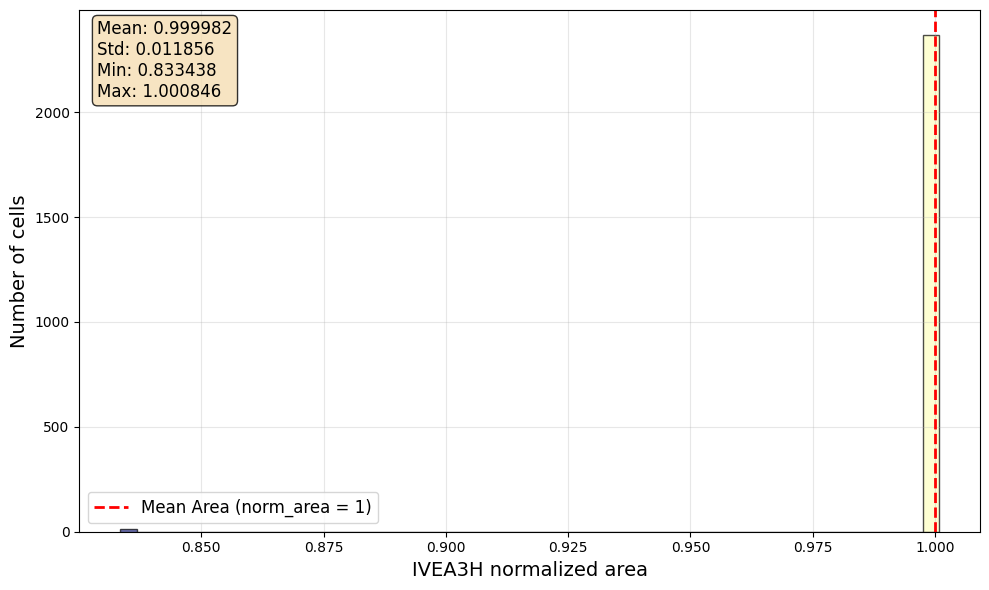

In [25]:
from vgrid.stats.dggalstats import dggal_norm_area_hist

dggal_norm_area_hist(dggs_type, dggal_inspect)

### Distribution of DGGAL Area Distortions

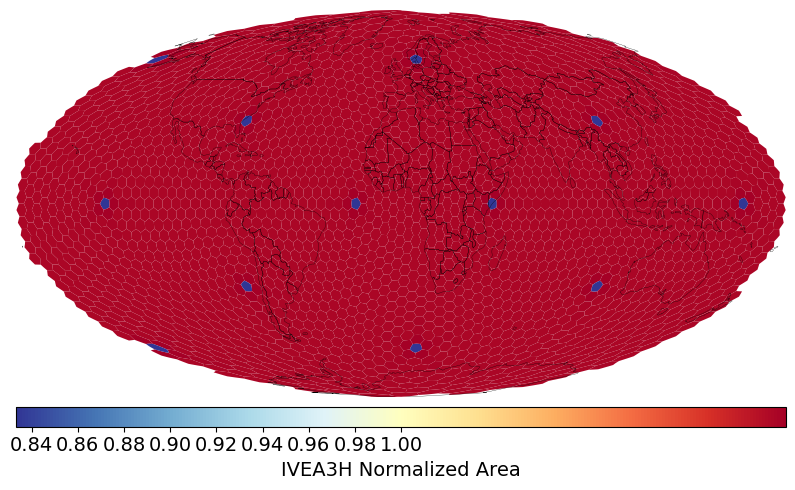

In [26]:
from vgrid.stats.dggalstats import dggal_norm_area

dggal_norm_area(dggs_type, dggal_inspect, crs="proj=moll")

### DGGAL IPQ Compactness Histogram

Isoperimetric Inequality (IPQ) Compactness (suggested by [Osserman, 1978](https://sites.math.washington.edu/~toro/Courses/20-21/MSF/osserman.pdf)):

$$C_{IPQ} = \frac{4 \pi A}{p^2}$$
The range of the IPQ compactness metric is [0,1]. 

A circle represents the maximum compactness with a value of 1. 

As shapes become more irregular or elongated, their compactness decreases toward 0.


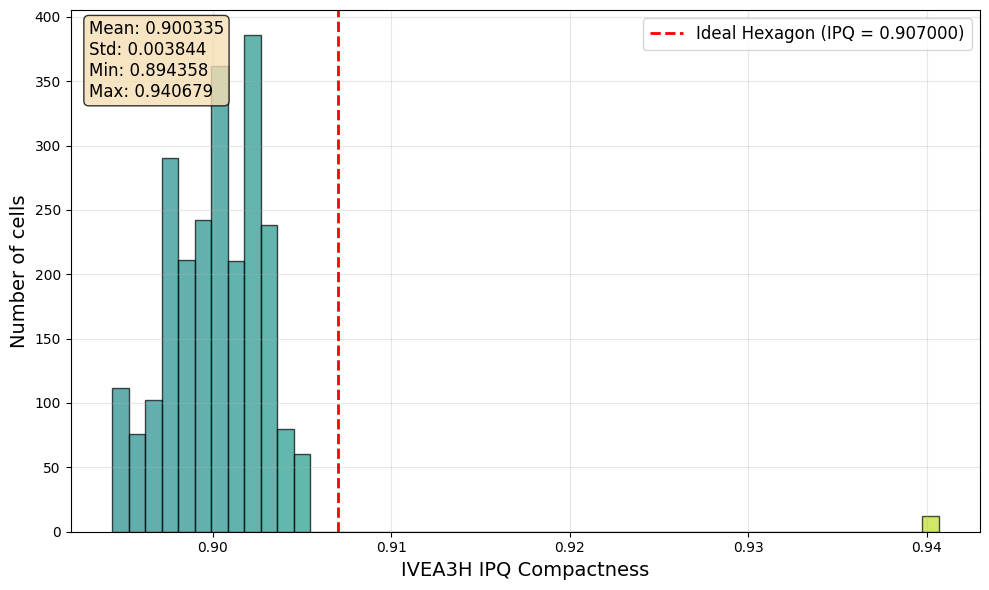

In [27]:
from vgrid.stats.dggalstats import dggal_compactness_ipq_hist

dggal_compactness_ipq_hist(dggs_type, dggal_inspect)

### Distribution of DGGAL IPQ Compactness

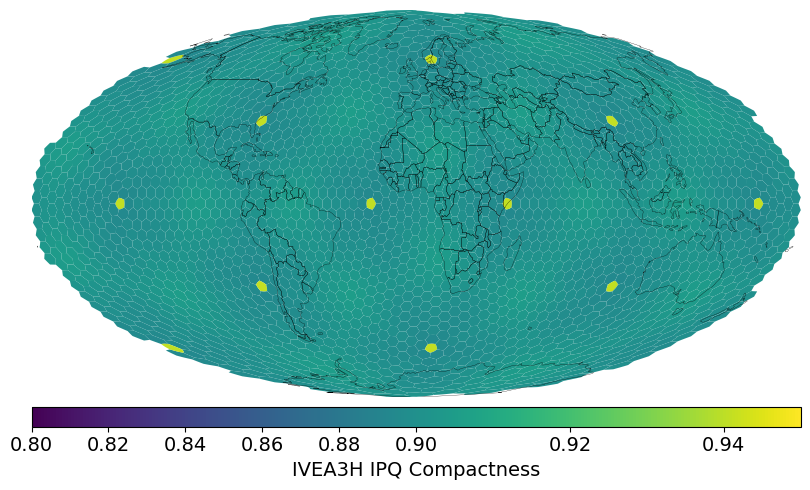

In [28]:
from vgrid.stats.dggalstats import dggal_compactness_ipq

dggal_compactness_ipq(dggs_type, dggal_inspect, crs="proj=moll")

DGGAL Convex hull Compactness Histogram:

$$C_{CVH} = \frac{A}{A_{CVH}}$$


The range of the Convex hull compactness metric is [0,1]. 

A circle represents the maximum compactness with a value of 1. 

As shapes become more irregular or elongated, their compactness decreases toward 0.


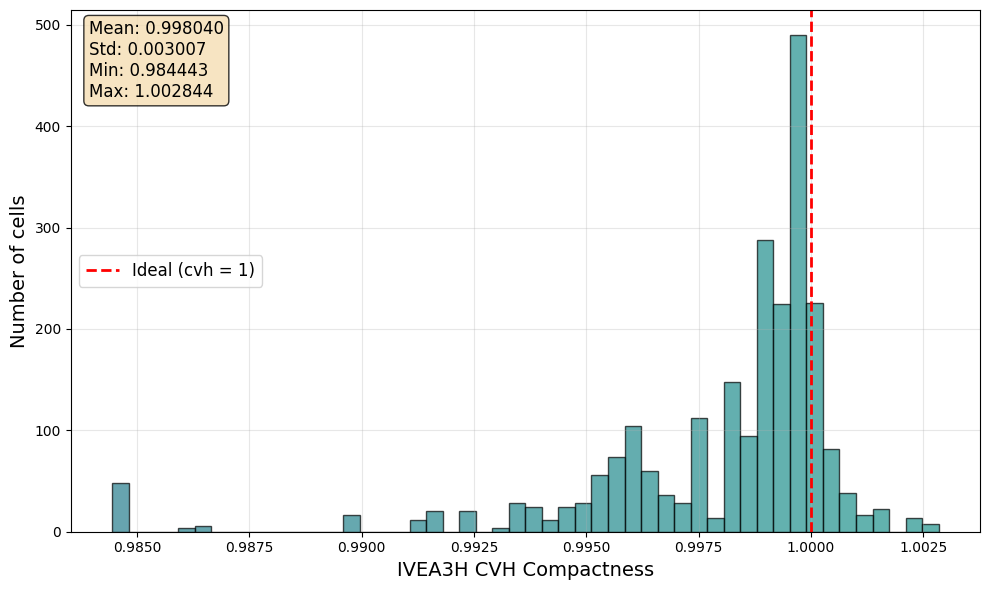

In [29]:
from vgrid.stats.dggalstats import dggal_compactness_cvh_hist

dggal_compactness_cvh_hist(dggs_type, dggal_inspect)

### Distribution of DGGAL Convex hull Compactness

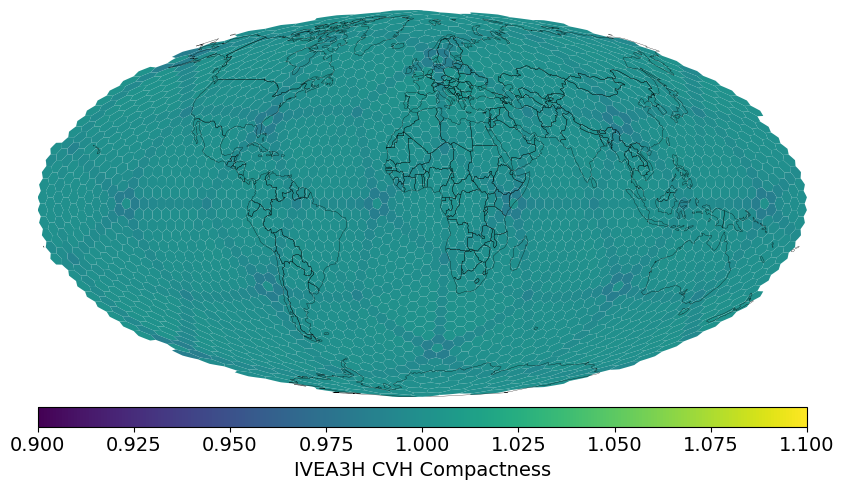

In [30]:
from vgrid.stats.dggalstats import dggal_compactness_cvh

dggal_compactness_cvh(dggs_type, dggal_inspect)

### DGGAL Statistics

Characteristic Length Scale (CLS - suggested by Ralph Kahn): the diameter of a spherical cap of the same cell's area

In [31]:
from vgrid.stats.dggalstats import dggalstats

dggs_type = "ivea9r"  # choose one from ['gnosis','isea4r','isea9r','isea3h','isea7h','isea7h_z7',
# 'ivea4r','ivea9r','ivea3h','ivea7h','ivea7h_z7','rtea4r','rtea9r','rtea3h','rtea7h','rtea7h_z7','healpix','rhealpix']
dggal_stats = dggalstats(dggs_type, unit="m")
dggal_stats

resolution    number_of_cells  avg_edge_len_m  avg_cell_area_m2  \
0            0                 10    7.141888e+06      5.100656e+13   
1            1                 90    2.380629e+06      5.667396e+12   
2            2                810    7.935431e+05      6.297106e+11   
3            3               7290    2.645144e+05      6.996785e+10   
4            4              65610    8.817146e+04      7.774205e+09   
5            5             590490    2.939049e+04      8.638006e+08   
6            6            5314410    9.796828e+03      9.597785e+07   
7            7           47829690    3.265609e+03      1.066421e+07   
8            8          430467210    1.088536e+03      1.184912e+06   
9            9         3874204890    3.628455e+02      1.316569e+05   
10          10        34867844010    1.209485e+02      1.462854e+04   
11          11       313810596090    4.031617e+01      1.625393e+03   
12          12      2824295364810    1.343872e+01      1.805992e+02   
13          13     25418658283290    4.479574e+00      2.006658e+01   
14          14    228767924549610    1.493191e+00      2.229620e+00   
15          15   2058911320946490    4.977304e-01      2.477356e-01   
16          16  18530201888518410    1.659101e-01      2.752618e-02   

           cls_m  
0   8.199500e+06  
1   2.691252e+06  
2   8.956018e+05  
3   2.984793e+05  
4   9.949109e+04  
5   3.316362e+04  
6   1.105454e+04  
7   3.684846e+03  
8   1.228282e+03  
9   4.094273e+02  
10  1.364758e+02  
11  4.549192e+01  
12  1.516397e+01  
13  5.054658e+00  
14  1.684886e+00  
15  5.616287e-01  
16  1.872096e-01